# Data pre-processing

In [38]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [39]:
from fastai.tabular.all import *
from fastai.metrics import * 
from fastai.callback.hook import *
from sklearn.metrics import roc_auc_score 


path = Path('/Users/baranserajelahi/Codes/fraud-detection-pytorch-scikit-fastai/data')
#path = Path('/home/jupyter/fraud-detection-pytorch-scikit-fastai/data')

Path.BASE_PATH = path
pd.options.display.max_rows = 500
pd.options.display.max_columns = 300

In [5]:
train_ss = pd.read_csv(path/'train_ss.csv', index_col=[0], low_memory=False)

In [6]:
train_ss.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
562834,3549834,0,14919126,57.95,W,4806,490.0,150.0,visa,226.0,debit,315.0,87.0,0.0,NaN,comcast.net,NaN,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,2.0,0.0,NaN,NaN,81.0,31.0,NaN,NaN,NaN,NaN,81.0,81.0,NaN,NaN,NaN,81.0,T,T,T,NaN,NaN,T,T,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80660,3067660,0,1731739,150.00,R,2114,396.0,150.0,mastercard,224.0,debit,315.0,87.0,NaN,NaN,yahoo.com,sbcglobal.net,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,115.041664,0.041666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,75759.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,-360.0,Found,Found,166.0,NaN,312.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 10,ie 11.0 for desktop,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Trident/7.0
347704,3334704,0,8559796,47.95,W,10112,360.0,150.0,visa,166.0,debit,264.0,87.0,2.0,NaN,NaN,NaN,3.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,3.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0,T,T,T,NaN,NaN,F,F,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196807,3183807,0,4427895,39.00,W,4806,490.0,150.0,visa,226.0,debit,315.0,87.0,NaN,NaN,aol.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565353,3552353,0,14995132,280.00,W,16873,343.0,150.0,visa,226.0,credit,512.0,87.0,1.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,8.0,1.0,135.0,135.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,136.0,136.0,NaN,NaN,NaN,136.0,T,T,T,M0,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train_ss.shape

(59054, 95)

In [8]:
train_ss.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9', 'id_01', 'id_02', 'id_03', 'id_04',
       'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12',
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20',
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28',
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [9]:
# I had to do this so that the learner would automatically use FlattenedLoss of 
# CrossEntropyLoss() as the loss function. Leaving the dep_var as an int causes 
# FlattenedLoss of MSELoss() to be chosen.
train_ss['isFraud'] = train_ss['isFraud'].astype('category')

In [10]:
train_ss['isFraud']

562834    0
80660     0
347704    0
196807    0
565353    0
         ..
331087    0
130888    0
170061    0
262042    0
509283    0
Name: isFraud, Length: 59054, dtype: category
Categories (2, int64): [0, 1]

In [11]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38'] 
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11']
dep_var = 'isFraud'

In [12]:
train_ss[cat].nunique()

ProductCD           5
card1            6146
card2             500
card3              68
card4               4
card5              82
card6               4
addr1             143
addr2              33
P_emaildomain      59
R_emaildomain      58
M1                  2
M2                  2
M3                  2
M4                  3
M5                  2
M6                  2
M7                  2
M8                  2
M9                  2
DeviceType          2
DeviceInfo        762
id_12               2
id_13              37
id_14              19
id_15               3
id_16               2
id_17              61
id_18              11
id_19             351
id_20             201
id_21             117
id_22               9
id_23               3
id_24               7
id_25             104
id_26              51
id_27               2
id_28               2
id_29               2
id_30              71
id_31             104
id_32               3
id_33             116
id_34               3
id_35     

There are a number of categorical variables where the number of categories has high cardinality, so deep learning might help us in this senerio.

In [14]:
# The rows with TransactionID <= 12666124 comprise the first 70% of the data (approximately)
cut_off = math.floor(train_ss['TransactionDT'].min() + 
                    (train_ss['TransactionDT'].max() - train_ss['TransactionDT'].min())*0.8)
cut_off

12666124

In [15]:
cond = train_ss['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [16]:
len(valid_idx)

10563

In [17]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(train_ss, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [18]:
(path/'to_nn.pkl').save(to_nn)

# NN without V*** features

In [40]:
to_nn = (path/'to_nn.pkl').load()

In [41]:
to_nn.items

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,dist1_na,dist2_na,D1_na,D2_na,D3_na,D4_na,D5_na,D6_na,D7_na,D8_na,D9_na,D10_na,D11_na,D12_na,D13_na,D14_na,D15_na,id_01_na,id_02_na,id_03_na,id_04_na,id_05_na,id_06_na,id_07_na,id_08_na,id_09_na,id_10_na,id_11_na
80660,-1.149491,0,-1.126594,0.068744,3,362,295,30,3,71,3,71,27,-0.185432,-0.084357,54,43,-0.095027,-0.089979,-0.034183,-0.047698,-0.212887,-0.109543,-0.051393,-0.047708,-0.264766,-0.048674,-0.095369,-0.052071,-0.231303,-0.141872,-0.593601,-0.277029,-0.238215,-0.491509,-0.245165,-0.146367,-0.097679,0.670303,-5.136873,-0.544472,-0.376135,-0.131715,-0.078849,-0.1213,-0.503489,0,0,0,0,0,0,0,0,0,0.164293,-0.794794,-0.022869,0.031179,-0.153464,0.184234,0.00822,0.014181,-0.028004,0.035332,0.108970,2,28,5,1,1,31,0,123,79,0,0,0,0,0,0,0,1,1,41,75,2,62,3,2,1,2,2,1,666,2,2,1,2,2,2,2,2,2,1,1,2,2,2,2,2,2,1,1,1,1,1,1,2,2,1,1,1
347704,0.752115,0,0.727788,-0.373009,5,2965,259,30,4,41,3,54,27,-0.214767,-0.084357,0,0,-0.081391,-0.084096,-0.034183,-0.061210,-0.172854,-0.109543,-0.051393,-0.057034,-0.140301,-0.057956,-0.085654,-0.052071,-0.216391,-0.103460,-0.593601,-0.277029,-0.238215,-0.491509,-0.245165,-0.146367,-0.097679,-0.150149,0.109557,-0.586058,-0.589801,-0.131715,-0.078849,-0.1213,-0.731065,2,2,2,0,0,1,1,2,2,0.164293,-0.145667,-0.022869,0.031179,-0.153464,0.184234,0.00822,0.014181,-0.028004,0.035332,0.108970,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,2,2,2,2,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
196807,-0.322414,0,-0.394365,-0.411751,5,1267,389,30,4,73,3,71,27,-0.185432,-0.084357,3,0,-0.095027,-0.089979,-0.034183,-0.061210,-0.212887,-0.109543,-0.051393,-0.057034,-0.202533,-0.057956,-0.095369,-0.052071,-0.231303,-0.141872,-0.593601,-0.277029,-0.238215,-0.619217,-0.245165,-0.146367,-0.097679,-0.150149,0.109557,-0.615762,-0.626640,-0.131715,-0.078849,-0.1213,-0.758157,0,0,0,1,2,1,0,0,0,0.164293,-0.145667,-0.022869,0.031179,-0.153464,0.184234,0.00822,0.014181,-0.028004,0.035332,0.108970,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,2,2,1,2,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
452433,1.497885,0,1.541637,0.068744,3,3914,154,30,4,73,3,75,27,-0.185432,-0.084357,54,19,-0.095027,-0.089979,-0.034183,-0.047698,-0.212887,-0.109543,-0.051393,-0.047708,-0.264766,-0.048674,-0.095369,-0.052071,-0.231303,-0.141872,-0.593601,-0.277029,-0.238215,-0.619217,-0.245165,-0.146367,-0.097679,10.041550,0.809087,-0.544472,-0.376135,-0.131715,-0.078849,-0.1213,-0.758157,0,0,0,0,0,0,0,0,0,0.164293,-1.150648,-0.022869,0.031179,0.601226,-11.543178,0.00822,0.014181,-0.028004,0.035332,-4.814417,2,28,6,2,2,31,3,137,153,0,0,0,0,0,0,0,1,1,42,45,2,16,3,2,1,2,1,1,685,2,2,1,2,2,1,2,1,2,1,1,2,2,2,2,2,1,1,1,2,2,1,1,2,2,1,1,1
433846,1.365528,0,1.381473,0.025239,5,3676,259,30,4,41,3,29,27,-0.185432,-0.084357,54,0,-0.081391,-0.084096,-0.034183,-0.061210,-0.172854,-0.083324,-0.051393,-0.057034,-0.140301,-0.057956,-0.085654,-0.052071,-0.201480,-0.103460,-0.593601,-0.277029,-0.238215,-0.619217,-0.245165,-0.146367,-0.097679,-0.150149,0.109557,-0.615762,-0.626640,-0.131715,-0.078849,-0.1213,-0.758157,2,2,2,0,0,1,1,1,2,0.164293,-0.145667,-0.022869,0.031179,-0.153464,0.184234,0.00822,0.014181,-0.028004,0.035332,0.108970,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,2,2,1,2,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [42]:
dls = to_nn.dataloaders(1024)

In [43]:
F1_score = F1Score()
F2_score = FBeta(2)
F5_score = FBeta(5)
F10_score = FBeta(10)
metrics = [BalancedAccuracy(), accuracy, Precision(), Recall(), F1_score, F2_score, F5_score, F10_score, RocAucBinary()]

Let's also use the ActivationStats callback to diagnose the condition of our neural network.

In [44]:
learn = tabular_learner(dls, [200, 100], metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(0.04365158379077912, 0.0014454397605732083)

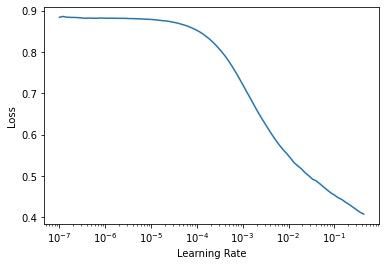

In [45]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [46]:
learn.fit(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,balanced_accuracy_score,accuracy,precision_score,recall_score,f1_score,fbeta_score,fbeta_score,fbeta_score,roc_auc_score,time
0,0.149314,0.245207,0.502737,0.966108,0.666667,0.005571,0.011050,0.006949,0.005792,0.005626,0.780500,00:19
1,0.109418,0.131729,0.593104,0.961564,0.375661,0.197772,0.259124,0.218462,0.201440,0.198703,0.807220,00:19
2,0.091419,0.140233,0.590661,0.962037,0.383333,0.192201,0.256030,0.213490,0.195958,0.193154,0.774506,00:18
3,0.080566,0.138549,0.590983,0.965256,0.472222,0.189415,0.270378,0.215190,0.193881,0.190545,0.774833,00:19


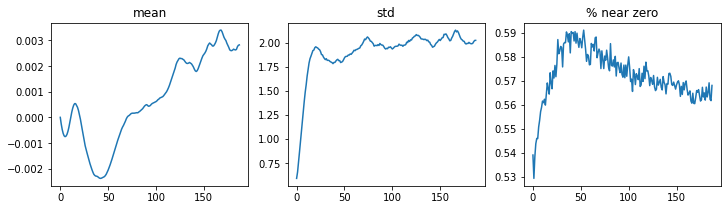

In [47]:
learn.activation_stats.plot_layer_stats(-2)

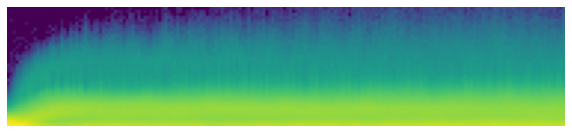

In [48]:
learn.activation_stats.color_dim(-2)

(0.0005248074419796466, 9.12010818865383e-07)

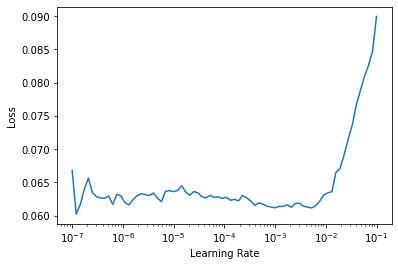

In [49]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [50]:
learn.fit_one_cycle(4, 1e-4, wd=0.01)

epoch,train_loss,valid_loss,balanced_accuracy_score,accuracy,precision_score,recall_score,f1_score,fbeta_score,fbeta_score,fbeta_score,roc_auc_score,time
0,0.061041,0.138338,0.619615,0.963457,0.434783,0.250696,0.318021,0.273889,0.254846,0.251752,0.792312,00:15
1,0.058795,0.140650,0.618124,0.963173,0.427885,0.247911,0.313933,0.270681,0.251987,0.248948,0.790969,00:17
2,0.056528,0.141945,0.616830,0.963268,0.429268,0.245125,0.312057,0.268129,0.249237,0.246171,0.792914,00:18
3,0.054938,0.143070,0.620812,0.963173,0.429245,0.253482,0.318739,0.276092,0.257538,0.254514,0.790628,00:19


In [51]:
interp = ClassificationInterpretation.from_learner(learn)

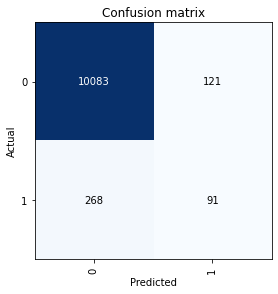

In [61]:
fig = interp.plot_confusion_matrix()


# NN with V*** features

In [62]:
train_s = pd.read_csv(path/'train_s.csv', index_col=[0], low_memory=False)
train_s['isFraud'] = train_s['isFraud'].astype('category')

In [63]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38']
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38',
       'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47',
       'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56',
       'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65',
       'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74',
       'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83',
       'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92',
       'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101',
       'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109',
       'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117',
       'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125',
       'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133',
       'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141',
       'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149',
       'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157',
       'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165',
       'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173',
       'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181',
       'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189',
       'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197',
       'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205',
       'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213',
       'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221',
       'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229',
       'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237',
       'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245',
       'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253',
       'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261',
       'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269',
       'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277',
       'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285',
       'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293',
       'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301',
       'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309',
       'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317',
       'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325',
       'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333',
       'V334', 'V335', 'V336', 'V337', 'V338', 'V339'] 
dep_var='isFraud'

In [64]:
assert len(cat)+len(cont)==(len(train_s.columns)-1)

In [65]:
# The rows with TransactionID <= 12666124 comprise the first 70% of the data (approximately)
cut_off = math.floor(train_ss['TransactionDT'].min() + 
                    (train_ss['TransactionDT'].max() - train_ss['TransactionDT'].min())*0.8)
cut_off

12666124

In [66]:
cond = train_s['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [67]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(train_s, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [68]:
(path/'to_nn_full.pkl').save(to_nn)

In [73]:
to_nn_full = (path/'to_nn_full.pkl').load()

In [74]:
dls = to_nn.dataloaders(1024)

In [75]:
learn = tabular_learner(dls, layers=[200, 100], metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(0.012022644281387329, 0.0012022644514217973)

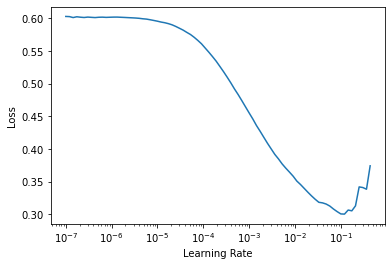

In [76]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [77]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,balanced_accuracy_score,accuracy,precision_score,recall_score,f1_score,fbeta_score,fbeta_score,fbeta_score,roc_auc_score,time
0,0.196498,0.356542,0.573228,0.969895,0.815385,0.147632,0.250000,0.176549,0.152434,0.148839,0.515227,01:18
1,0.121357,0.122169,0.591943,0.969706,0.705263,0.186630,0.295154,0.218811,0.192062,0.187998,0.817793,01:24
2,0.088928,0.121316,0.606185,0.968664,0.609375,0.217270,0.320329,0.249361,0.222784,0.218663,0.814580,01:12
3,0.070553,0.126233,0.621428,0.966960,0.529412,0.250696,0.340265,0.280199,0.255878,0.252010,0.812818,01:09


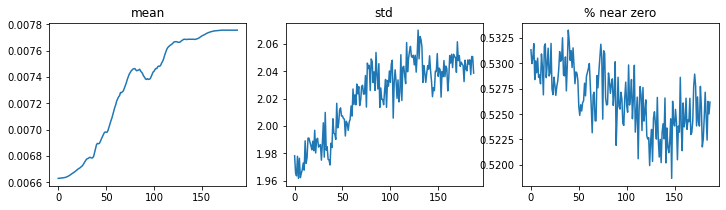

In [82]:
learn.activation_stats.plot_layer_stats(-2)

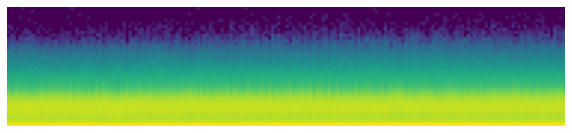

In [83]:
learn.activation_stats.color_dim(-2)

(5.754399462603033e-05, 0.00015848931798245758)

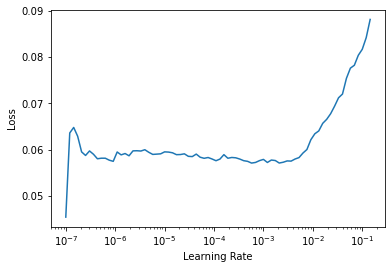

In [80]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep 

In [81]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,balanced_accuracy_score,accuracy,precision_score,recall_score,f1_score,fbeta_score,fbeta_score,fbeta_score,roc_auc_score,time
0,0.057299,0.125804,0.607284,0.968191,0.585185,0.220056,0.319838,0.251432,0.225467,0.221424,0.804631,01:02
1,0.057166,0.128572,0.621330,0.966771,0.523256,0.250696,0.338983,0.279851,0.255822,0.251996,0.798766,01:03
2,0.055098,0.129937,0.624263,0.967244,0.538012,0.256267,0.347170,0.286248,0.261535,0.257603,0.800807,01:07
3,0.052147,0.129717,0.631079,0.967434,0.541899,0.270195,0.360595,0.300310,0.275508,0.271543,0.807629,01:06


In [84]:
interp = ClassificationInterpretation.from_learner(learn)

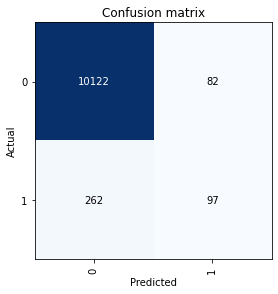

In [85]:
interp.plot_confusion_matrix()

# Imbalance

## RandomUnderSampler without V*** features

In [210]:
from imblearn.under_sampling import RandomUnderSampler

In [211]:
rus = RandomUnderSampler(random_state=42)

In [212]:
train_ss = pd.read_csv(path/'train_ss.csv', index_col=[0], low_memory=False)

In [213]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((train_ss['TransactionDT'].max() - train_ss['TransactionDT'].min())*0.8)

cond = train_ss['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))
cut_off

12579507

In [214]:
assert (len(train_idx) + len(valid_idx) == len(train_ss))

In [215]:
train = train_ss.iloc[train_idx]
valid = train_ss.iloc[valid_idx]

In [216]:
assert (len(train) + len(valid) == len(train_ss))

In [217]:
train, train_target = rus.fit_resample(train.drop(['isFraud'], axis=1), train['isFraud'])

In [218]:
train['isFraud'] = train_target

In [219]:
train.shape, train_target.shape

((3442, 95), (3442,))

In [220]:
train.index, valid.index

(RangeIndex(start=0, stop=3442, step=1),
 Int64Index([571056, 538612, 557768, 526898, 497577, 502230, 560962, 558531,
             486709, 550868,
             ...
             488275, 567722, 488047, 563480, 502767, 511411, 588799, 556655,
             483712, 590071],
            dtype='int64', length=10697))

In [221]:
df_nn = pd.concat([train, valid])

In [222]:
assert (len(train) + len(valid) == len(df_nn))

In [223]:
df_nn.shape

(14139, 95)

In [224]:
df_nn['isFraud'] = df_nn['isFraud'].astype('category')

In [225]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((df_nn['TransactionDT'].max() - df_nn['TransactionDT'].min())*0.8)

cond = df_nn['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))
cut_off

12578785

In [226]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38'] 
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11']
dep_var = 'isFraud'

In [227]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [228]:
to_nn.train.xs.shape, to_nn.valid.xs.shape

((3442, 122), (10697, 122))

In [229]:
dls = to_nn.dataloaders(1024)

In [230]:
F1_score = F1Score()
recall = Recall()
precision = Precision()
roc_score = RocAucBinary()
metrics = [accuracy, precision, recall, F1_score, roc_score]

In [277]:
learn = tabular_learner(dls, metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [231]:
learn = tabular_learner(dls, [500, 250], metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(0.03019951581954956, 0.005248074419796467)

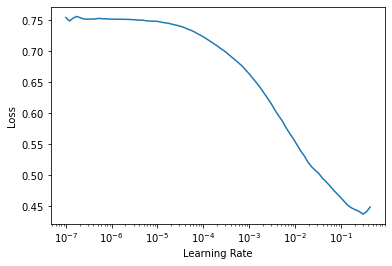

In [278]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [279]:
learn.fit_one_cycle(8, lr_steep, wd=0.1)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.693860,0.626824,0.965411,0.000000,0.000000,0.000000,0.682502,00:01
1,0.618264,0.648838,0.851360,0.110969,0.470270,0.179567,0.753589,00:01
2,0.534761,0.736544,0.303076,0.044607,0.937838,0.085164,0.761440,00:01
3,0.464453,0.815185,0.275778,0.043220,0.943243,0.082652,0.767344,00:01
4,0.410201,0.945613,0.229878,0.041812,0.970270,0.080170,0.765333,00:02
5,0.366725,1.040721,0.217538,0.041179,0.970270,0.079005,0.773956,00:02
6,0.330806,1.112946,0.203702,0.040595,0.972973,0.077939,0.778280,00:01
7,0.302733,1.159122,0.196223,0.040232,0.972973,0.077270,0.782410,00:02


/opt/anaconda3/envs/fastaiV2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


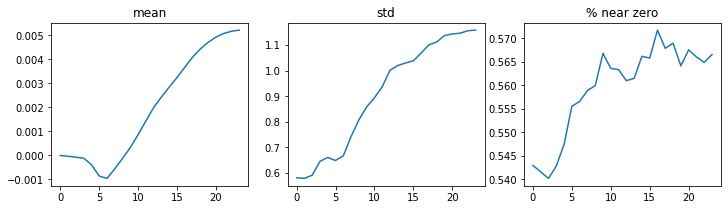

In [280]:
learn.activation_stats.plot_layer_stats(-2)

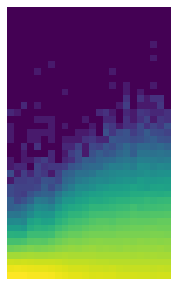

In [281]:
learn.activation_stats.color_dim(-2)

(0.0013182567432522773, 0.005248074419796467)

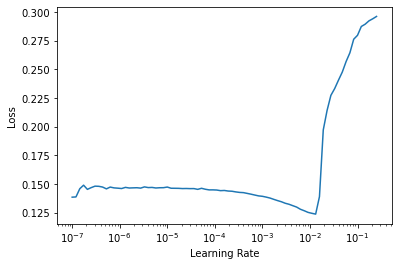

In [283]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [284]:
learn.fit_one_cycle(4, lr_steep, wd=0.1)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.144870,1.282844,0.165560,0.038810,0.972973,0.074642,0.783547,00:01
1,0.138291,1.609724,0.142750,0.038009,0.978378,0.073176,0.784697,00:01
2,0.124450,1.869816,0.121903,0.036950,0.972973,0.071195,0.783200,00:01
3,0.112054,1.865767,0.131345,0.037241,0.970270,0.071728,0.787137,00:01


(0.001096478197723627, 0.009120108559727669)

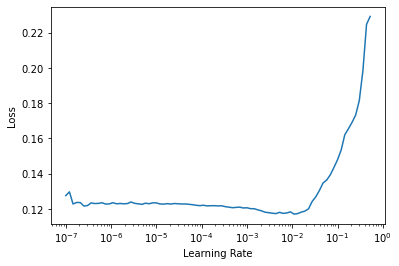

In [253]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [192]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.148749,0.662074,0.582406,0.066455,0.848649,0.123258,0.797638,00:01
1,0.140396,0.697902,0.514724,0.059726,0.883784,0.111891,0.797818,00:02
2,0.129573,0.708971,0.520052,0.060517,0.886486,0.113299,0.800537,00:02
3,0.120062,0.708463,0.533140,0.061457,0.875676,0.114853,0.803659,00:02


In [193]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.095859,0.736087,0.517341,0.059871,0.881081,0.112124,0.804696,00:02
1,0.090533,0.826133,0.462373,0.055216,0.902703,0.104066,0.803238,00:02
2,0.082498,0.834870,0.490231,0.058230,0.905405,0.109423,0.807334,00:02
3,0.076608,0.828288,0.518089,0.060929,0.897297,0.114109,0.809252,00:02


In [194]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.058901,0.847004,0.535010,0.061858,0.878378,0.115576,0.807550,00:02
1,0.055463,0.874809,0.564364,0.065789,0.878378,0.122411,0.807958,00:02
2,0.051228,0.893896,0.592316,0.069100,0.864865,0.127974,0.810938,00:02
3,0.047717,0.903653,0.613817,0.072322,0.859459,0.133417,0.809750,00:02


(0.0005248074419796466, 0.0030199517495930195)

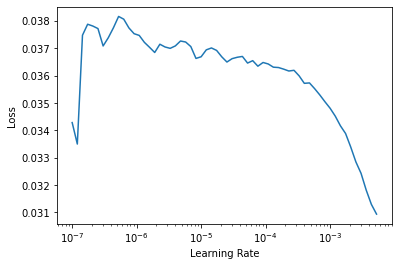

In [195]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [120]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.021618,1.424576,0.550996,0.063251,0.867568,0.117906,0.799764,00:01
1,0.023682,0.890764,0.765729,0.102086,0.740541,0.179437,0.816352,00:01
2,0.030473,1.370933,0.629242,0.071088,0.805405,0.130644,0.777963,00:01
3,0.032706,1.348405,0.656633,0.074246,0.778378,0.135561,0.788298,00:01


(0.0005248074419796466, 0.0020892962347716093)

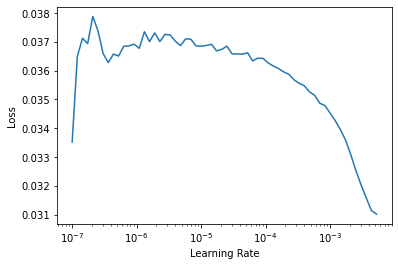

In [196]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [198]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.034611,1.154839,0.633168,0.071601,0.802703,0.131474,0.789079,00:01
1,0.034253,1.116667,0.695616,0.081739,0.762162,0.147644,0.799974,00:01
2,0.032919,1.363455,0.649808,0.073737,0.789189,0.134873,0.790957,00:01
3,0.028927,1.333484,0.676545,0.078099,0.772973,0.141865,0.794943,00:01


(0.00036307806149125097, 0.001737800776027143)

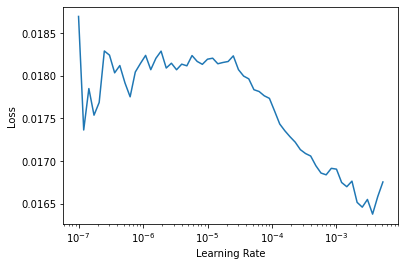

In [199]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [200]:
learn.fit_one_cycle(4, 2e-4, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.019082,1.336904,0.689820,0.080296,0.762162,0.145286,0.795412,00:01
1,0.018275,1.322580,0.705431,0.082558,0.743243,0.148608,0.796249,00:01
2,0.017402,1.350479,0.706179,0.082254,0.737838,0.148008,0.794515,00:01
3,0.016704,1.370244,0.707301,0.082552,0.737838,0.148491,0.793633,00:01


In [201]:
learn.fit_one_cycle(4, 7e-5, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.014504,1.390593,0.707301,0.082552,0.737838,0.148491,0.793058,00:01
1,0.013853,1.399379,0.707582,0.082121,0.732432,0.147684,0.791921,00:01
2,0.013776,1.407031,0.707955,0.081967,0.729730,0.147380,0.791228,00:01
3,0.013762,1.417763,0.708049,0.081992,0.729730,0.147420,0.790877,00:01


In [285]:
interp = ClassificationInterpretation.from_learner(learn)

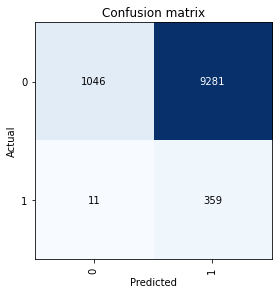

In [286]:
interp.plot_confusion_matrix()

In [204]:
cm = interp.confusion_matrix()

In [205]:
sum(sum(cm))

10697

In [206]:
assert sum(sum(cm)) == len(valid)

In [207]:
valid['isFraud'].sum()

370

## RandomUnderSampler with V*** features

In [117]:
from imblearn.under_sampling import RandomUnderSampler

In [118]:
rus = RandomUnderSampler(random_state=42)

In [119]:
train_s = pd.read_csv(path/'train_s.csv', index_col=[0], low_memory=False)

In [120]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((train_s['TransactionDT'].max() - train_s['TransactionDT'].min())*0.8)

cond = train_s['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))
cut_off

12579548

In [121]:
assert (len(train_idx) + len(valid_idx) == len(train_s))

train = train_s.iloc[train_idx]
valid = train_s.iloc[valid_idx]

assert (len(train) + len(valid) == len(train_s))

In [122]:
train, train_target = rus.fit_resample(train.drop(['isFraud'], axis=1), train['isFraud'])

train['isFraud'] = train_target

train.shape, train_target.shape

((3544, 434), (3544,))

In [123]:
df_nn = pd.concat([train, valid])

assert (len(train) + len(valid) == len(df_nn))

df_nn.shape

(14352, 434)

In [124]:
df_nn['isFraud'] = df_nn['isFraud'].astype('category')

In [125]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((df_nn['TransactionDT'].max() - df_nn['TransactionDT'].min())*0.8)

cond = df_nn['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))
cut_off

12579028

In [126]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38']
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38',
       'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47',
       'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56',
       'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65',
       'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74',
       'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83',
       'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92',
       'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101',
       'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109',
       'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117',
       'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125',
       'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133',
       'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141',
       'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149',
       'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157',
       'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165',
       'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173',
       'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181',
       'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189',
       'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197',
       'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205',
       'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213',
       'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221',
       'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229',
       'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237',
       'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245',
       'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253',
       'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261',
       'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269',
       'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277',
       'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285',
       'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293',
       'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301',
       'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309',
       'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317',
       'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325',
       'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333',
       'V334', 'V335', 'V336', 'V337', 'V338', 'V339'] 
dep_var='isFraud'

In [146]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [147]:
to_nn.train.xs.shape, to_nn.valid.xs.shape

((3544, 768), (10808, 768))

In [148]:
dls = to_nn.dataloaders(1024)

In [149]:
F1_score = F1Score()
recall = Recall()
precision = Precision()
roc_score = RocAucBinary()
metrics = [accuracy, precision, recall, F1_score, roc_score]

In [150]:
learn = tabular_learner(dls, metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(0.010000000149011612, 0.0030199517495930195)

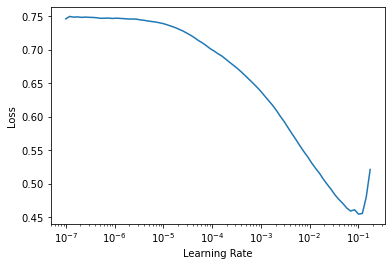

In [151]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [152]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.676083,140.047760,0.850666,0.137582,0.581864,0.222543,0.810391,00:02
1,0.593782,394.883179,0.813842,0.125290,0.680101,0.211599,0.812228,00:02
2,0.526018,725.545593,0.775444,0.108712,0.710327,0.188566,0.812771,00:02
3,0.473228,1051.157715,0.775074,0.107032,0.697733,0.185595,0.814256,00:02


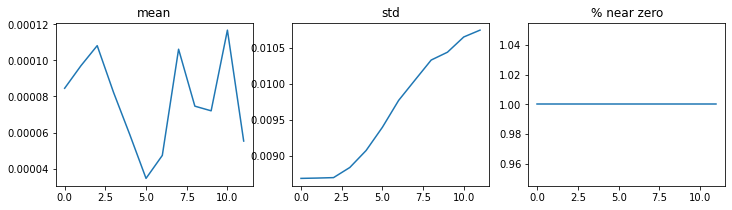

In [134]:
learn.activation_stats.plot_layer_stats(1)

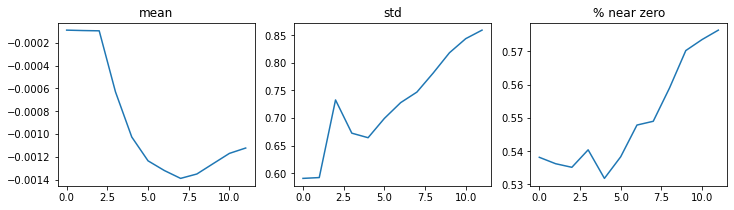

In [135]:
learn.activation_stats.plot_layer_stats(-2)

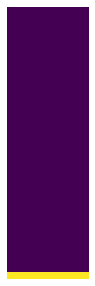

In [136]:
learn.activation_stats.color_dim(1)

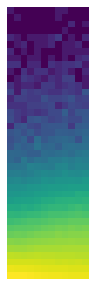

In [142]:
learn.activation_stats.color_dim(-2)

(0.0019054606556892395, 0.001737800776027143)

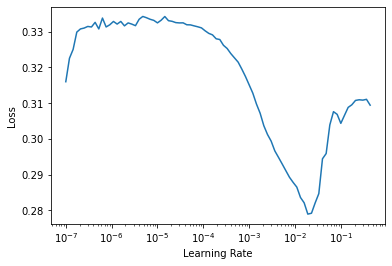

In [140]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [141]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.330164,372.459351,0.743431,0.101075,0.758186,0.178370,0.820929,00:02
1,0.315179,409.553864,0.733346,0.099064,0.773300,0.175629,0.826058,00:02
2,0.293172,571.897949,0.728904,0.098828,0.785894,0.175577,0.829567,00:02
3,0.277312,820.303040,0.721780,0.097222,0.793451,0.173220,0.829046,00:02


In [138]:
interp = ClassificationInterpretation.from_learner(learn)

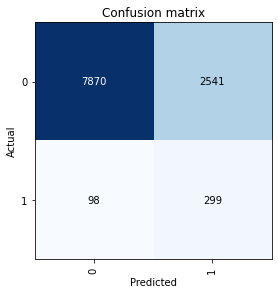

In [139]:
interp.plot_confusion_matrix()

## RandomOverSampler without V*** features

In [304]:
from imblearn.over_sampling import RandomOverSampler

In [305]:
ros = RandomOverSampler(random_state=42)

In [306]:
train_ss = pd.read_csv(path/'train_ss.csv', index_col=[0], low_memory=False)

In [307]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((train_ss['TransactionDT'].max() - train_ss['TransactionDT'].min())*0.8)

cond = train_ss['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))
cut_off

12579507

In [308]:
assert (len(train_idx) + len(valid_idx) == len(train_ss))

train = train_ss.iloc[train_idx]
valid = train_ss.iloc[valid_idx]

assert (len(train) + len(valid) == len(train_ss))

In [309]:
train, train_target = ros.fit_resample(train.drop(['isFraud'], axis=1), train['isFraud'])

train['isFraud'] = train_target

train.shape, train_target.shape

((93272, 95), (93272,))

In [310]:
df_nn = pd.concat([train, valid])

assert (len(train) + len(valid) == len(df_nn))

df_nn.shape

(103969, 95)

In [311]:
df_nn['isFraud'] = df_nn['isFraud'].astype('category')

In [312]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((df_nn['TransactionDT'].max() - df_nn['TransactionDT'].min())*0.8)

cond = df_nn['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))
cut_off

12579507

In [313]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38'] 
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11']
dep_var = 'isFraud'

In [314]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [315]:
to_nn.train.xs.shape, to_nn.valid.xs.shape

((93272, 122), (10697, 122))

In [316]:
dls = to_nn.dataloaders(1024)

In [317]:
F1_score = F1Score()
recall = Recall()
precision = Precision()
roc_score = RocAucBinary()
metrics = [accuracy, precision, recall, F1_score, roc_score]

In [318]:
learn = tabular_learner(dls, metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(0.014454397559165954, 0.002511886414140463)

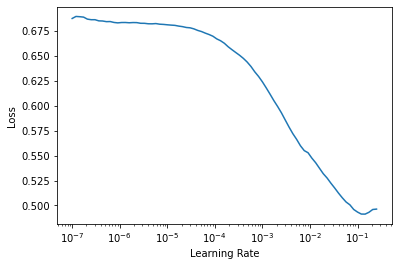

In [319]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [320]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.245073,0.240063,0.911097,0.183206,0.454054,0.261072,0.804083,00:31
1,0.094821,0.234945,0.956156,0.360563,0.345946,0.353103,0.831379,00:37
2,0.032494,0.285595,0.955875,0.326531,0.259459,0.289157,0.809014,00:36
3,0.011035,0.293642,0.958119,0.353383,0.254054,0.295597,0.814451,00:36


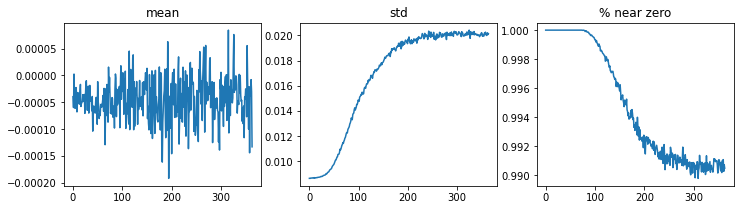

In [321]:
learn.activation_stats.plot_layer_stats(1)

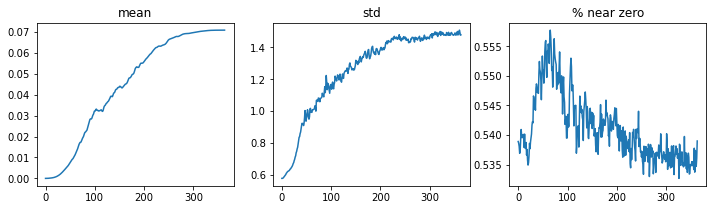

In [322]:
learn.activation_stats.plot_layer_stats(-2)

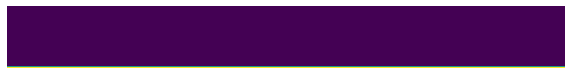

In [323]:
learn.activation_stats.color_dim(1)

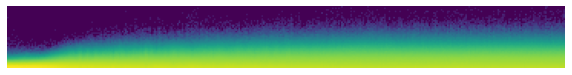

In [324]:
learn.activation_stats.color_dim(-2)

(3.6307807022240014e-06, 6.309573450380412e-07)

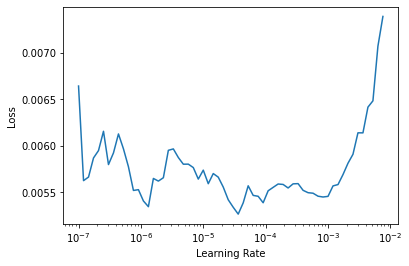

In [325]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [332]:
learn.fit_one_cycle(4, 5e-6)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.005528,0.293647,0.958119,0.351145,0.248649,0.291139,0.814114,00:30
1,0.005345,0.293586,0.958493,0.359848,0.256757,0.299685,0.814579,00:33
2,0.005277,0.292976,0.958493,0.360902,0.259459,0.301887,0.815500,00:36
3,0.005115,0.293870,0.958680,0.362595,0.256757,0.300633,0.815369,00:36


## RandomOverSampler with V*** features

In [377]:
from imblearn.over_sampling import RandomOverSampler

In [378]:
ros = RandomOverSampler(random_state=42)

In [379]:
train_s = pd.read_csv(path/'train_s.csv', index_col=[0], low_memory=False)

In [380]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((train_s['TransactionDT'].max() - train_s['TransactionDT'].min())*0.8)

cond = train_s['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))
cut_off

12579507

In [381]:
assert (len(train_idx) + len(valid_idx) == len(train_s))

train = train_s.iloc[train_idx]
valid = train_s.iloc[valid_idx]

assert (len(train) + len(valid) == len(train_s))

In [382]:
train, train_target = ros.fit_resample(train.drop(['isFraud'], axis=1), train['isFraud'])

train['isFraud'] = train_target

train.shape, train_target.shape

((93272, 434), (93272,))

In [383]:
df_nn = pd.concat([train, valid])

assert (len(train) + len(valid) == len(df_nn))

df_nn.shape

(103969, 434)

In [384]:
df_nn['isFraud'] = df_nn['isFraud'].astype('category')

In [385]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((df_nn['TransactionDT'].max() - df_nn['TransactionDT'].min())*0.8)

cond = df_nn['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))
cut_off

12579507

In [386]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38']
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38',
       'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47',
       'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56',
       'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65',
       'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74',
       'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83',
       'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92',
       'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101',
       'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109',
       'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117',
       'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125',
       'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133',
       'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141',
       'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149',
       'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157',
       'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165',
       'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173',
       'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181',
       'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189',
       'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197',
       'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205',
       'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213',
       'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221',
       'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229',
       'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237',
       'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245',
       'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253',
       'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261',
       'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269',
       'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277',
       'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285',
       'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293',
       'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301',
       'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309',
       'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317',
       'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325',
       'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333',
       'V334', 'V335', 'V336', 'V337', 'V338', 'V339'] 
dep_var='isFraud'

In [387]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [388]:
to_nn.train.xs.shape, to_nn.valid.xs.shape

((93272, 800), (10697, 800))

In [389]:
dls = to_nn.dataloaders(1024)

In [390]:
F1_score = F1Score()
recall = Recall()
precision = Precision()
roc_score = RocAucBinary()
metrics = [accuracy, precision, recall, F1_score, roc_score]

In [391]:
learn = tabular_learner(dls, metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(0.006918309628963471, 0.0020892962347716093)

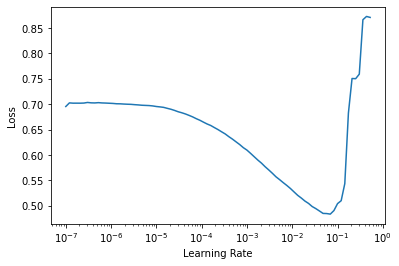

In [392]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [393]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.262564,0.181661,0.938114,0.273292,0.475676,0.347140,0.838002,02:04
1,0.114396,0.282475,0.893896,0.168257,0.524324,0.254760,0.799517,02:14
2,0.042211,0.206074,0.953632,0.352113,0.405405,0.376884,0.802502,02:24
3,0.014761,0.245901,0.962419,0.451515,0.402703,0.425714,0.825729,02:22


## Class weighting NN without V*** features

In [81]:
df = pd.read_csv(path/'train_ss.csv', index_col=[0])

In [82]:
class_count_df = df.groupby('isFraud').count()['TransactionID']

n_0, n_1 = class_count_df[0], class_count_df[1]

w_0 = (n_0 + n_1) / (2.0 * n_0)
w_1 = (n_0 + n_1) / (2.0 * n_1)

In [83]:
to_nn = (path/'to_nn.pkl').load()

In [84]:
to_nn.valid.y.sum()

363

In [75]:
dls = to_nn.dataloaders(1024)

weights = [w_0, w_1]
class_weights=torch.FloatTensor(weights).cuda()
loss_func = CrossEntropyLossFlat(weight=class_weights)

learn = tabular_learner(dls, layers=[500, 250], loss_func=loss_func, metrics=metrics)
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(0.0033113110810518267, 0.0030199517495930195)

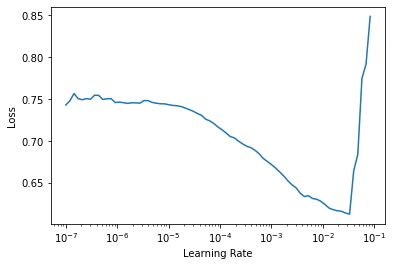

In [76]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [414]:
learn.fit_one_cycle(4, 1e-3 , wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.551992,0.610342,0.732074,0.084277,0.683784,0.150059,0.770860,00:13
1,0.438037,0.562923,0.733009,0.087865,0.716216,0.156527,0.791054,00:15
2,0.325018,0.632818,0.820043,0.119804,0.662162,0.202899,0.818343,00:16
3,0.238657,0.677338,0.855847,0.141809,0.627027,0.231306,0.812684,00:16


## Class weighting NN with V*** features 

In [85]:
df = pd.read_csv(path/'train_s.csv', index_col=[0])

In [86]:
class_count_df = df.groupby('isFraud').count()['TransactionID']

n_0, n_1 = class_count_df[0], class_count_df[1]

w_0 = (n_0 + n_1) / (2.0 * n_0)
w_1 = (n_0 + n_1) / (2.0 * n_1)

In [87]:
to_nn = (path/'to_nn_full.pkl').load()

In [88]:
to_nn.valid.y.sum()

397

In [111]:
dls = to_nn.dataloaders(1024)

weights = [w_0, w_1]
class_weights=torch.FloatTensor(weights).cuda()
loss_func = CrossEntropyLossFlat(weight=class_weights)

learn = tabular_learner(dls, layers=[200, 100], loss_func=loss_func, metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(0.005754399299621582, 0.04786301031708717)

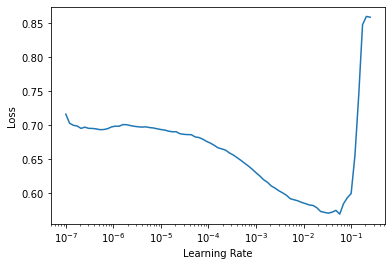

In [102]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [115]:
learn.fit_one_cycle(4, 2e-3 , wd=0.2)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.237215,0.766366,0.587158,0.064495,0.758186,0.118878,0.767242,00:16
1,0.267241,0.765038,0.775629,0.108494,0.707809,0.188149,0.817176,00:16
2,0.231753,0.785389,0.834474,0.136743,0.659950,0.226546,0.825776,00:16
3,0.190337,0.949994,0.872132,0.163363,0.602015,0.256989,0.811118,00:16


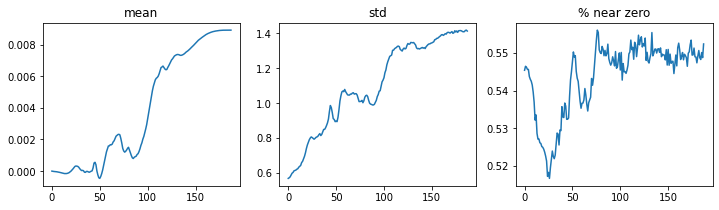

In [106]:
learn.activation_stats.plot_layer_stats(-2)

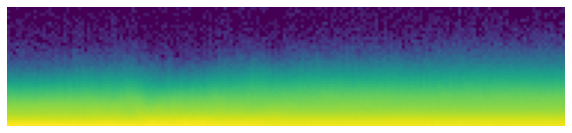

In [116]:
learn.activation_stats.color_dim(-2)

(1.58489319801447e-07, 9.12010818865383e-07)

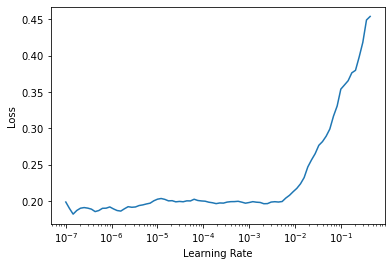

In [108]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [68]:
learn.fit_one_cycle(4, 2e-5 , wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.214285,0.666580,0.843172,0.139444,0.632242,0.228493,0.825089,00:16
1,0.212085,0.681069,0.846040,0.141076,0.627204,0.230342,0.822724,00:16
2,0.210470,0.689198,0.844745,0.139561,0.624685,0.228151,0.821438,00:16
3,0.208171,0.683245,0.847150,0.141224,0.622166,0.230196,0.823289,00:16


In [113]:
interp = ClassificationInterpretation.from_learner(learn)

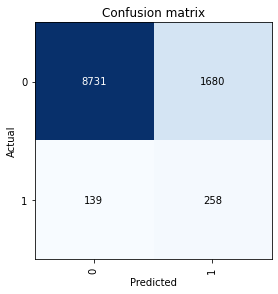

In [114]:
interp.plot_confusion_matrix()